<a href="https://colab.research.google.com/github/TruongHieuDEV/MachineLearning/blob/main/PolynomialandGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XnW3PiBiHIuanDQmSiLNoc1toAaMBxOY' -O dataset3.csv

--2023-04-17 04:38:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.1s    

2023-04-17 04:38:37 (696 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]

--2023-04-17 04:38:37--  https://docs.google.com/uc?export=download&id=1XnW3PiBiHIuanDQmSiLNoc1toAaMBxOY
Resolving docs.google.com (docs.google.com)... 142.250.99.100, 142.250.99.102, 142.250.99.113, ...
Connecting to docs.google.

Buổi học trước chúng ta đã cùng nhau tìm hiểu về thuật toán **polynomial regression** và **gradient descent**. Nhóm 1 đã trình bày về 2 thuật toán này bên dưới, mọi người hãy cùng nhau tham khảo ạ!!!

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

%matplotlib inline
sns.set_context('notebook')

#Polynomial Regression



##Lấy dữ liệu



In [23]:

df = pd.read_csv('dataset3.csv')
df.head()

,Unnamed: 0,y,x0,x1,x2,x3,x4
0,0,-0.245841,1.0,-0.383285,0.146907,-0.056307,0.021582
1,1,1.839005,1.0,0.831785,0.691866,0.575484,0.478679
2,2,0.859224,1.0,0.415071,0.172284,0.071510,0.029682
3,3,-0.174309,1.0,-0.628672,0.395228,-0.248469,0.156205
4,4,0.013225,1.0,-0.087517,0.007659,-0.000670,0.000059


Ta chỉ xét hồi quy đa thức cho biến y đối với x1. Trước hết hãy visualize dữ liệu

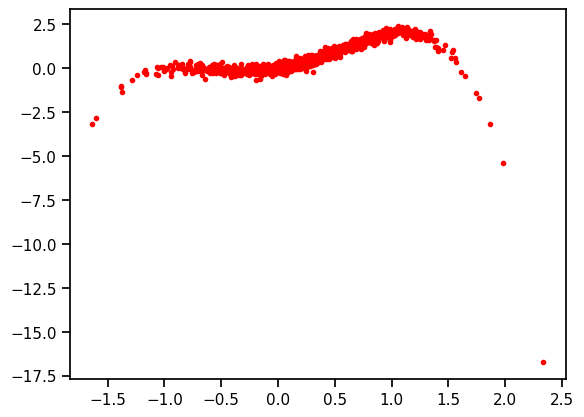

In [24]:
plt.plot()
plt.plot(df.x1, df.y, 'r.')
plt.show()

### Xác định mô hình đa thức


In [25]:
#Enter your code here
def transfer_deg(X, deg):
    res = X.copy()
    for i in range(2, deg + 1):
        res = np.concatenate((res, X**i))
    return res.reshape((deg, X.shape[0])).T


x1 = pd.Series.to_numpy(df.x1)
f1 = transfer_deg(x1, 4)

y = pd.Series.to_numpy(df.y)
Xbar = np.concatenate((f1, np.ones((f1.shape[0], 1))), axis=1)
A = Xbar.T @ Xbar
b = Xbar.T @ y
w = np.linalg.pinv(A) @ b
def predict(X):
    global w, bias
    return X @ w
def compute_cost(Y, Y_):
    return np.mean((Y - Y_)**2)
compute_cost(y, predict(Xbar))

0.02959090688282679

## Trực quan hoá dữ liệu



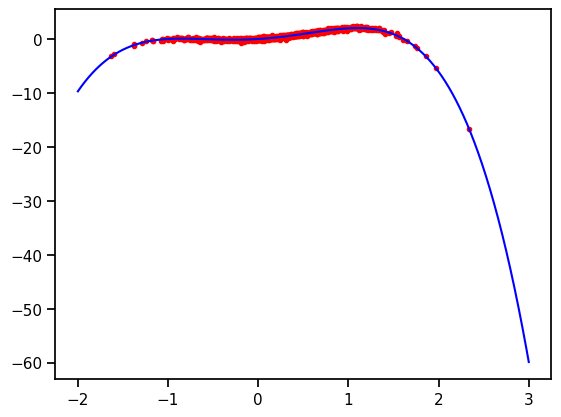

In [26]:
vtX = np.linspace(-2, 3, 1000)

plt.plot(df.x1, df.y, 'r.')
vtY = w[0] * vtX + w[1]  * vtX**2  + w[2] *vtX  ** 3 + w[3] * vtX ** 4+ w[4]
# print(vtY)
plt.plot(vtX, vtY, 'blue') 
plt.show()

#Gradient Desent

In [27]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [28]:
data = df[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]\
        .rename(columns={'FUELCONSUMPTION_HWY': 'HWY',
                 'FUELCONSUMPTION_COMB_MPG': 'COMB_MPG'})
print(data)


       HWY  COMB_MPG  CO2EMISSIONS
0      6.7        33           196
1      7.7        29           221
2      5.8        48           136
3      9.1        25           255
4      8.7        27           244
...    ...       ...           ...
1062   9.8        24           271
1063   9.5        25           264
1064   9.8        24           271
1065   9.3        25           260
1066  10.2        22           294

[1067 rows x 3 columns]


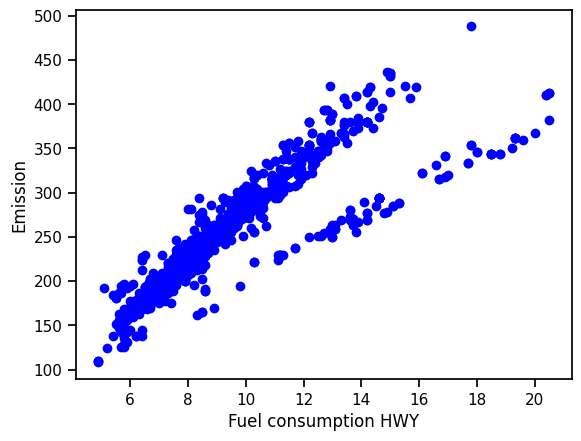

In [29]:
plt.scatter(data.HWY, data.CO2EMISSIONS, color="blue")
plt.xlabel("Fuel consumption HWY")
plt.ylabel("Emission")
plt.show();

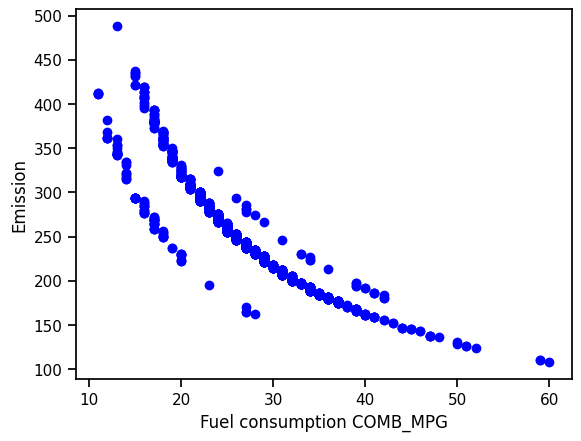

In [30]:
plt.scatter(data.COMB_MPG, data.CO2EMISSIONS, color="blue")
plt.xlabel("Fuel consumption COMB_MPG")
plt.ylabel("Emission")
plt.show();

In [31]:
msk = np.random.rand(len(df)) < 0.8
train = data[msk]
test = data[~msk]

In [32]:
#tính toán cost function dựa trên data và w hiện tại
def compute_cost(X_train, y_train, w):
  return (.5/X_train.shape[0]) * np.linalg.norm(y_train-X_train.dot(w) , 2) ** 2


##Tính đạo hàm dựa trên công thức rút ra từ khai triển taylor

Mọi người có thể xem cách chứng minh ở trang này: https://machinelearningcoban.com/2017/01/12/gradientdescent/

In [33]:
#Tinh toán đạo hàm dựa trên đạo hàm lân cận 2 bên
def numerical_Grad(X_train, y_train, w):
  eps = 1e-4
  gradient = np.zeros_like(w)
  for i in range(len(w)):
    w_r = w.copy()
    w_l = w.copy()
    w_r[i] += eps
    w_l[i] -= eps
    gradient[i] += (compute_cost(X_train, y_train, w_r) - compute_cost(X_train, y_train, w_l)) / (2 * eps)
  return gradient
    

## Tính đạo hàm bình thường 

In [34]:
def compute_Grad(X_train, y_train, w):
  return 1/X_train.shape[0] * (X_train.T).dot((X_train.dot(w) - y_train))


## Gradient_Descent

**Có thể sử dụng 1 trong 2 cách đạo hàm trên, nhưng thường mình sẽ sử dụng định nghĩa thay vì dùng hàm đạo hàm vì một số trường hợp đi tìm đạo hàm là điều không khả thi. Vì vậy ở trong ví dụ này, tôi xin phép được tính đạo hàm dựa trên định nghĩa!!**


Nếu giá trị đạo hàm sấp xỉ 0, đối với bộ dữ liệu này. Tôi sẽ so sánh đạo hàm với 1 số rất nhỏ là 10 mũ -15, khi đạo hàm bé hơn mức là tức là mô hình này đã rất gần với điểm hội tụ, nên trả về kết quả

In [35]:
def has_converaged(X_train, y_train, w):
  return np.linalg.norm(numerical_Grad(X_train, y_train, w)) / len(w) < 1e-15

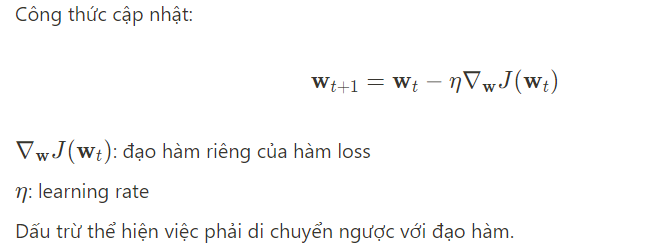

In [36]:
def gradient_Descent(X_train, y_train, w, alpha):
  J_history = []
  weight = [w]
  for i in range(100000):
    grad = numerical_Grad(X_train, y_train, weight[-1])
    weight_new = weight[-1] - alpha * grad
    J_history.append(compute_cost(X_train, y_train, weight[-1]))
    weight.append(weight_new)
    if has_converaged(X_train, y_train, weight_new):
      print(1)
      break;


  return weight, J_history

##Model


Chuẩn bị dữ liệu train cho mô hình

In [37]:
sizes = train.shape[0]
COMB_MPG = np.array(train['COMB_MPG'])
HWY = np.array(train['HWY'])
EMISSION = np.array(train['CO2EMISSIONS'])
Xtrain = np.concatenate((HWY, COMB_MPG, np.ones(sizes)), axis=0).reshape((3, sizes)).T
ytrain = EMISSION


Khởi tạo điểm ban đầu và chọn learning rate. Trong mô hình Gradient Descent, tốc độ phụ thuộc vào điểm ban đầu và learning rate. Vậy làm sao để chọn được learning rate và điểm ban đầu phù hợp, chúng ta sẽ nói thêm ở phần sau, còn ở phần này tôi chọn điểm ban đầu bằng 0 và learning rate là một số rất nhỏ!!! Khi chọn điểm khởi tạo ban đầu nếu điểm đó càng gần với local minium thì tốc độ hội tụ càng nhanh, còn khi chọn learning rate cần lưu ý:"Nếu learning rate quá nhỏ thì tốc độ hội tụ chậm, nhưng nếu nó lớn thì nó thậm chí không hội tụ mà cứ luẩn quẩn xung quanh local minium


In [38]:
weight = np.ones((1, Xtrain.shape[1]))
alpha = 0.00202323424
cost_st = compute_cost(Xtrain, ytrain, weight[-1])
print(cost_st)

26172.082488235294


Bây giờ cùng chạy model GD và xem kết quả!!

In [39]:
weight, J_history = gradient_Descent(Xtrain, ytrain, weight[-1], alpha)
cost_end = compute_cost(Xtrain, ytrain, weight[-1])
print(cost_end)

364.0685681981603


In [40]:
print(weight[-1])
print(weight[-1].dot(Xtrain[0]))
print(EMISSION[0])

[ 13.10511981  -2.9595732  209.43200995]
199.57039703118994
196


##GD + Momentum


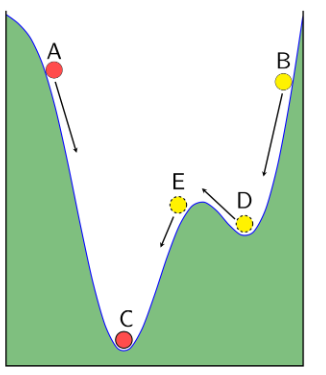

Nếu chỉ sử dụng GD thì khi gần tới D, ta sẽ thu được đạo hàm sấp xỉ 0. Cuối cùng thuật toán của chúng ta sẽ hội tụ tại điểm D, nhưng bạn hãy nhìn về phía $E$, và nó dẫn ta tới điểm global minimum, đấy mới chính là kết quả mong muốn của mô hình. Trên thực tế, chúng ta có thể thấy nếu thuật toán đi xuống từ B là một con dốc rất cao thì nó đáng ra phải có quán tính và bay ra khỏi điểm local minimum $D$ đúng không? Nhưng GD qua mỗi lần cập nhật giá trị chúng ta có thể thấy nó chỉ ảnh hưởng bởi độ dốc hiện tại, vì vậy khi gần tới 1 điểm local minimum nó sẽ gần như bằng không. Trong thuật toán Gradient Descent chúng ta cần tính toán một đại lượng tại thời điểm t để cập nhật giá trị mới cho nghiệm. Hãy xem đó là vận tốc tại thời điểm $t$, và nó sẽ lưu thông tin độ dốc và thông tin của đà (vận tốc trước đó $v_{t-1}$). Nếu chúng ta coi vận tốc ở thời điểm hiện tại là $v_t$ thì nghiệm ở thời điểm $t+1$ là $\theta_{t+1} = \theta_{t} - v_t$. Và như đã trình bày thì $v_t$ sẽ lưu thông tin độ dốc và thông tin của đà ( vận tốc bước trước đó ) nên ta sẽ tính $v$ theo công thức: 